1. Найти экстремумы. <br>
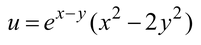

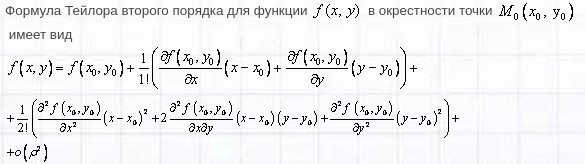

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
from matplotlib import cm
from sympy import *

x, y = symbols('x, y', real=True)

z = exp(x - y) * (x**2 - 2 * y**2)

print('Уравнение поверхности: z = ',z)

# Производные первого порядка по x и y
z_d_x = diff(z, x, 1)
z_d_y = diff(z, y, 1)

print('\nЧастная производная по x:\n', z_d_x)
print('\nЧастная производная по y:\n', z_d_y)

# Выражаем y из z_d_x и подставляем в z_d_y
z_d_y1 = z_d_y.subs([(y, solve(z_d_x, y)[0])])
z_d_y2 = z_d_y.subs([(y, solve(z_d_x, y)[1])])

print('\ny из частной производной по x: ', solve(z_d_x, y))
print('\nЧастная производная по y (подставили выражение сверху): \n', z_d_y1, '\n', z_d_y2)

# Находим координаты x стац. точек
x_stac = solve(z_d_y1, x)
print('\nx stac ', solve(z_d_y1, x))

# Подставляем координаты x стац. точек в частн. произв. по x
# и выражаем из неё координаты точки y
y_stac1 = solve(z_d_x.subs([(x, x_stac[0])]), y)
print('y stac 1 ', y_stac1)

y_stac2 = solve(z_d_x.subs([(x, x_stac[1])]), y)
print('y stac 2 ', y_stac2)

p1 = Point(x_stac[0], y_stac1[0])
p2 = Point(x_stac[0], y_stac1[1])
p3 = Point(x_stac[1], y_stac2[0])

print('\nСтац. точки: ')
pprint(p1)
pprint(p2)
pprint(p3)

# Уравнения Тейлора в стац. точках (2 приближение)

p = p1

# z_t1 = (z.subs([(x, p[0]), (y, p[1])]) +
# z_d_x.subs([(x, p[0]), (y, p[1])]) * (x - p[0]) +
# z_d_y.subs([(x, p[0]), (y, p[1])]) * (y - p[1]) +
# 0.5 * diff(z, x, 2).subs([(x, p[0]), (y, p[1])]) * (x - p[0])**2 +
# 0.5 * diff(z, y, 2).subs([(x, p[0]), (y, p[1])]) * (y - p[1])**2 +
# diff(diff(z, x, 1), y, 1).subs([(x, p[0]), (y, p[1])]) * (x - p[0]) * (y - p[1]))

z_t1 = (z.subs([(x, p[0]), (y, p[1])]) +
z_d_x.subs([(x, p[0]), (y, p[1])]) * (x - p[0]) +
z_d_y.subs([(x, p[0]), (y, p[1])]) * (y - p[1]) +
100 * diff(z, x, 2).subs([(x, p[0]), (y, p[1])]) * (x - p[0])**2 +
100 * diff(z, y, 2).subs([(x, p[0]), (y, p[1])]) * (y - p[1])**2 +
50 * diff(diff(z, x, 1), y, 1).subs([(x, p[0]), (y, p[1])]) * (x - p[0]) * (y - p[1]))

p = p2

z_t2 = (z.subs([(x, p[0]), (y, p[1])]) +
z_d_x.subs([(x, p[0]), (y, p[1])]) * (x - p[0]) +
z_d_y.subs([(x, p[0]), (y, p[1])]) * (y - p[1]) +
0.5 * diff(z, x, 2).subs([(x, p[0]), (y, p[1])]) * (x - p[0])**2 +
0.5 * diff(z, y, 2).subs([(x, p[0]), (y, p[1])]) * (y - p[1])**2 +
diff(diff(z, x, 1), y, 1).subs([(x, p[0]), (y, p[1])]) * (x - p[0]) * (y - p[1]))

p = p3

z_t3 = (z.subs([(x, p[0]), (y, p[1])]) +
z_d_x.subs([(x, p[0]), (y, p[1])]) * (x - p[0]) +
z_d_y.subs([(x, p[0]), (y, p[1])]) * (y - p[1]) +
0.5 * diff(z, x, 2).subs([(x, p[0]), (y, p[1])]) * (x - p[0])**2 +
0.5 * diff(z, y, 2).subs([(x, p[0]), (y, p[1])]) * (y - p[1])**2 +
diff(diff(z, x, 1), y, 1).subs([(x, p[0]), (y, p[1])]) * (x - p[0]) * (y - p[1]))

print('\nПриближения Тейлора второго порядка в стац. точках:')
print(z_t1)
print(z_t2)
print(z_t3)

Уравнение поверхности: z =  (x**2 - 2*y**2)*exp(x - y)

Частная производная по x:
 2*x*exp(x - y) + (x**2 - 2*y**2)*exp(x - y)

Частная производная по y:
 -4*y*exp(x - y) - (x**2 - 2*y**2)*exp(x - y)

y из частной производной по x:  [-sqrt(2)*sqrt(x*(x + 2))/2, sqrt(2)*sqrt(x*(x + 2))/2]

Частная производная по y (подставили выражение сверху): 
 2*sqrt(2)*sqrt(x*(x + 2))*exp(x + sqrt(2)*sqrt(x*(x + 2))/2) - (x**2 - x*(x + 2))*exp(x + sqrt(2)*sqrt(x*(x + 2))/2) 
 -2*sqrt(2)*sqrt(x*(x + 2))*exp(x - sqrt(2)*sqrt(x*(x + 2))/2) - (x**2 - x*(x + 2))*exp(x - sqrt(2)*sqrt(x*(x + 2))/2)

x stac  [-4, 0]
y stac 1  [-2, 2]
y stac 2  [0]

Стац. точки: 
Point2D(-4, -2)
Point2D(-4, 2)
Point2D(0, 0)

Приближения Тейлора второго порядка в стац. точках:
-600*(x + 4)**2*exp(-2) + 400*(x + 4)*(y + 2)*exp(-2) - 1200*(y + 2)**2*exp(-2) + 8*exp(-2)
-3.0*(x + 4)**2*exp(-6) - 8*(x + 4)*(y - 2)*exp(-6) + 10.0*(y - 2)**2*exp(-6) - 16*(y - 2)*exp(-6) + 8*exp(-6)
1.0*x**2 - 2.0*y**2


In [117]:
# построение графика

f = lambda x, y: np.exp(x - y) * (x**2 - 2 * y**2) # строим плоскость

fig = plt.figure(figsize=(10, 10)) # создаём холст

ax = fig.add_subplot(1, 1, 1, projection='3d')

xval = np.linspace(-4, 4, 100) # разбиение для x
yval = np.linspace(-4, 4, 100) # разбиение для y

x, y = np.meshgrid(xval, yval)

# точки на плоскости
p1 = np.array([[float(p1[0])], [float(p1[1])], [f(float(p1[0]), float(p1[1]))]])
p2 = np.array([[float(p2[0])], [float(p2[1])], [f(float(p2[0]), float(p2[1]))]])
p3 = np.array([[float(p3[0])], [float(p3[1])], [f(float(p3[0]), float(p3[1]))]])

z = f(x, y) # вычисляем значения z в точках

surf = ax.plot_surface(x, y, z, rstride=5, cstride=5, cmap=cm.plasma, alpha=0.5) # строим плоскость


f1_t = lambda x, y: (-600*(x + 4)**2*exp(-2) + 400*(x + 4)*(y + 2)*exp(-2) - 1200*(y + 2)**2*exp(-2) + 8*exp(-2))

# ax = fig.add_subplot(1, 1, 1, projection='3d')

xval = np.linspace(-4, 4, 100) # разбиение для x
yval = np.linspace(-4, 4, 100) # разбиение для y

x, y = np.meshgrid(xval, yval)

z = f1_t(x, y) # вычисляем значения z в точках

surf = ax.plot_surface(x, y, z, rstride=5, cstride=5, cmap=cm.plasma) # строим плоскость

ax.scatter(p1[0], p1[1], p1[2], c='red', marker='.', s=100)
ax.scatter(p2[0], p2[1], p2[2], c='red', marker='.', s=100)
ax.scatter(p3[0], p3[1], p3[2], c='red', marker='.', s=100)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('Плоскость 2x - 3y + 5z - 20 = 0')

ax.view_init(10, -30)
plt.show()